In [1]:
import pandas as pd
import numpy as np
from osprey.config import Config
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/Users/robert_arbon/anaconda/envs/ml4dyn/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/robert_arbon/anaconda/envs/ml4dyn/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
all_dfs = []
for i in range(1,6):
    df = Config('run{}/config-k2.yaml'.format(i)).trial_results()
    df['run'] = i
    all_dfs.append(df)
total_df = pd.concat(all_dfs)

Loading config file:     run1/config-k2.yaml...
Loading trials database: sqlite:///osprey-trials.db...
Loading config file:     run2/config-k2.yaml...
Loading trials database: sqlite:///osprey-trials.db...
Loading config file:     run3/config-k2.yaml...
Loading trials database: sqlite:///osprey-trials.db...
Loading config file:     run4/config-k2.yaml...
Loading trials database: sqlite:///osprey-trials.db...
Loading config file:     run5/config-k2.yaml...
Loading trials database: sqlite:///osprey-trials.db...


In [3]:
total_df.head()

,completed,config_sha1,elapsed,host,id,mean_test_score,mean_train_score,n_test_samples,n_train_samples,parameters,project_name,started,status,test_scores,traceback,train_scores,user,run
0,2018-01-13 17:08:56.304206,f5073bf84a2ea9a51d7dc4570b17242bc0fecb63,1970-01-01 00:00:03.006746,compute163.bc4.acrc.priv,1,3.087604,3.098339,"[50, 50, 50, 50, 50]","[50, 50, 50, 50, 50]","{'msm__sparse': False, 'msm__dt_traj': '1 step...",k5,2018-01-13 17:08:53.297460,SUCCEEDED,"[3.0867290945208, 3.0808565586817154, 3.089550...",None,"[3.1047279423548604, 3.0844412189758543, 3.100...",ra15808,1
1,2018-01-13 17:08:54.628764,5474c1fc7b1e29205c0f08bac137d2ca5bd6aeba,1970-01-01 00:00:01.149366,compute163.bc4.acrc.priv,2,3.070904,3.082066,"[50, 50, 50, 50, 50]","[50, 50, 50, 50, 50]","{'msm__sparse': False, 'msm__dt_traj': '1 step...",k4,2018-01-13 17:08:53.479398,SUCCEEDED,"[3.067095056978774, 3.0675485197144945, 3.0711...",None,"[3.0831352339509692, 3.081269430199865, 3.0796...",ra15808,1
2,2018-01-13 17:08:55.159273,bdf0a1ddc0722652ffe0373011e9c826e64895aa,1970-01-01 00:00:00.980451,compute163.bc4.acrc.priv,3,1.933060,1.942413,"[50, 50, 50, 50, 50]","[50, 50, 50, 50, 50]","{'msm__sparse': False, 'msm__count_mode': 'sli...",k2,2018-01-13 17:08:54.178822,SUCCEEDED,"[1.9303607145786001, 1.942842868108373, 1.9418...",None,"[1.941609154629563, 1.9416226554503795, 1.9426...",ra15808,1
3,2018-01-13 17:08:55.294398,e73721a3483fc1f7772c85760adbde080bf696ef,1970-01-01 00:00:01.000071,compute163.bc4.acrc.priv,4,2.612803,2.615377,"[50, 50, 50, 50, 50]","[50, 50, 50, 50, 50]","{'msm__sparse': False, 'msm__count_mode': 'sli...",k3,2018-01-13 17:08:54.294327,SUCCEEDED,"[2.618083697646979, 2.6105326052190314, 2.6098...",None,"[2.6118889510793286, 2.6185907907793076, 2.613...",ra15808,1
4,2018-01-13 17:08:55.653295,5474c1fc7b1e29205c0f08bac137d2ca5bd6aeba,1970-01-01 00:00:01.004790,compute163.bc4.acrc.priv,5,3.077725,3.076566,"[50, 50, 50, 50, 50]","[50, 50, 50, 50, 50]","{'msm__sparse': False, 'msm__dt_traj': '1 step...",k4,2018-01-13 17:08:54.648505,SUCCEEDED,"[3.078569698363513, 3.0932897326275817, 3.0727...",None,"[3.077536190393716, 3.0654088929117433, 3.0753...",ra15808,1


In [4]:
df = total_df.loc[:, ['parameters', 'project_name', 'test_scores', 'train_scores', 'run', 'started']]

In [5]:
df.head()

,parameters,project_name,test_scores,train_scores,run,started
0,"{'msm__sparse': False, 'msm__dt_traj': '1 step...",k5,"[3.0867290945208, 3.0808565586817154, 3.089550...","[3.1047279423548604, 3.0844412189758543, 3.100...",1,2018-01-13 17:08:53.297460
1,"{'msm__sparse': False, 'msm__dt_traj': '1 step...",k4,"[3.067095056978774, 3.0675485197144945, 3.0711...","[3.0831352339509692, 3.081269430199865, 3.0796...",1,2018-01-13 17:08:53.479398
2,"{'msm__sparse': False, 'msm__count_mode': 'sli...",k2,"[1.9303607145786001, 1.942842868108373, 1.9418...","[1.941609154629563, 1.9416226554503795, 1.9426...",1,2018-01-13 17:08:54.178822
3,"{'msm__sparse': False, 'msm__count_mode': 'sli...",k3,"[2.618083697646979, 2.6105326052190314, 2.6098...","[2.6118889510793286, 2.6185907907793076, 2.613...",1,2018-01-13 17:08:54.294327
4,"{'msm__sparse': False, 'msm__dt_traj': '1 step...",k4,"[3.078569698363513, 3.0932897326275817, 3.0727...","[3.077536190393716, 3.0654088929117433, 3.0753...",1,2018-01-13 17:08:54.648505


In [6]:
df['step'] = 0
df.sort_values(ascending=True, by='started', inplace=True)

In [7]:
df['step'] = df.groupby([ 'run','project_name']).cumcount(ascending=True)

In [8]:
df.loc[(df['project_name']=='k2') & (df['run']==2), :].head(10)

,parameters,project_name,test_scores,train_scores,run,started,step
0,"{'msm__sparse': False, 'msm__count_mode': 'sli...",k2,"[1.9420516287574867, 1.9417225266320988, 1.935...","[1.9424079743312872, 1.9406509025036605, 1.945...",2,2018-01-13 17:16:27.883516,0
9,"{'msm__sparse': False, 'msm__count_mode': 'sli...",k2,"[1.9428448075256397, 1.9396287665938312, 1.942...","[1.941844030431417, 1.9434816274424325, 1.9413...",2,2018-01-13 17:16:32.269883,1
14,"{'msm__sparse': False, 'msm__count_mode': 'sli...",k2,"[1.9364592431584817, 1.9376227982373766, 1.928...","[1.9426933464266782, 1.9418297158895172, 1.943...",2,2018-01-13 17:16:36.899431,2
17,"{'msm__sparse': False, 'msm__count_mode': 'sli...",k2,"[1.9379216729289512, 1.8837302136460634, 1.935...","[1.9432406107483866, 1.94033412998373, 1.94229...",2,2018-01-13 17:16:37.837786,3
19,"{'msm__sparse': False, 'msm__count_mode': 'sli...",k2,"[1.9319218006778742, 1.9447564018592132, 1.917...","[1.9420581333617335, 1.9397837830476554, 1.942...",2,2018-01-13 17:16:38.807772,4
23,"{'msm__sparse': False, 'msm__count_mode': 'sli...",k2,"[1.9354375963920787, 1.9417631018383423, 1.941...","[1.9417885552376961, 1.942870843433367, 1.9424...",2,2018-01-13 17:16:44.363566,5
27,"{'msm__sparse': False, 'msm__count_mode': 'sli...",k2,"[1.9390916645138674, 1.9271071349193245, 1.911...","[1.9413573522136174, 1.942889612092315, 1.9446...",2,2018-01-13 17:16:51.574609,6
29,"{'msm__sparse': False, 'msm__count_mode': 'sli...",k2,"[1.938737716335467, 1.9414677519196866, 1.9426...","[1.9441295305342328, 1.9427893100931255, 1.940...",2,2018-01-13 17:16:59.194485,7
35,"{'msm__sparse': False, 'msm__count_mode': 'sli...",k2,"[1.9301519400474254, 1.9379032518038752, 1.920...","[1.9403856645886646, 1.93940309482051, 1.93905...",2,2018-01-13 17:17:06.668451,8
40,"{'msm__sparse': False, 'msm__count_mode': 'sli...",k2,"[1.9374143950843086, 1.9422504425947094, 1.939...","[1.9437543833850228, 1.9417306379398105, 1.944...",2,2018-01-13 17:17:14.329439,9


In [9]:
df['k'] = df['parameters'].apply(lambda x: int(x['msm__score_k']))

In [10]:
df['m'] = df['parameters'].apply(lambda x: int(x['cluster__n_bins_per_feature']))

In [11]:
df['MCV_train'] = df['train_scores'].apply(lambda x: np.mean(x))
df['MCV_test'] = df['test_scores'].apply(lambda x: np.mean(x))

In [12]:
df.head()

,parameters,project_name,test_scores,train_scores,run,started,step,k,m,MCV_train,MCV_test
0,"{'msm__sparse': False, 'msm__dt_traj': '1 step...",k5,"[3.0867290945208, 3.0808565586817154, 3.089550...","[3.1047279423548604, 3.0844412189758543, 3.100...",1,2018-01-13 17:08:53.297460,0,5,733,3.098339,3.087604
1,"{'msm__sparse': False, 'msm__dt_traj': '1 step...",k4,"[3.067095056978774, 3.0675485197144945, 3.0711...","[3.0831352339509692, 3.081269430199865, 3.0796...",1,2018-01-13 17:08:53.479398,0,4,264,3.082066,3.070904
2,"{'msm__sparse': False, 'msm__count_mode': 'sli...",k2,"[1.9303607145786001, 1.942842868108373, 1.9418...","[1.941609154629563, 1.9416226554503795, 1.9426...",1,2018-01-13 17:08:54.178822,0,2,140,1.942413,1.933060
3,"{'msm__sparse': False, 'msm__count_mode': 'sli...",k3,"[2.618083697646979, 2.6105326052190314, 2.6098...","[2.6118889510793286, 2.6185907907793076, 2.613...",1,2018-01-13 17:08:54.294327,0,3,157,2.615377,2.612803
4,"{'msm__sparse': False, 'msm__dt_traj': '1 step...",k4,"[3.078569698363513, 3.0932897326275817, 3.0727...","[3.077536190393716, 3.0654088929117433, 3.0753...",1,2018-01-13 17:08:54.648505,1,4,156,3.076566,3.077725


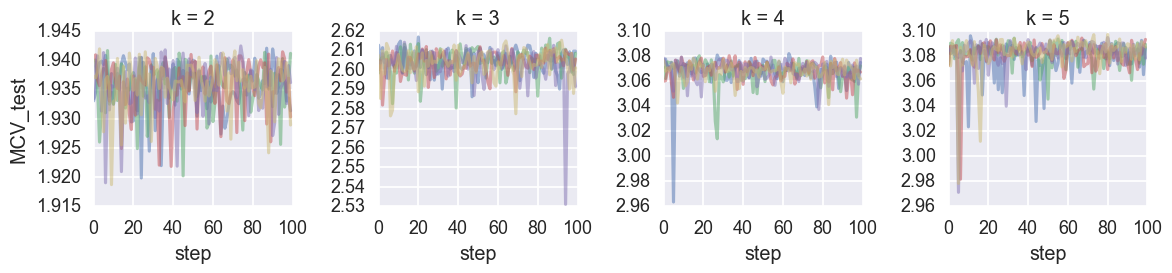

In [20]:
with sns.plotting_context('talk', font_scale=1):
    g = sns.FacetGrid(data=df, col='k', hue='run', sharey='col')
    g.map(plt.plot, 'step', 'MCV_test', alpha=0.5)

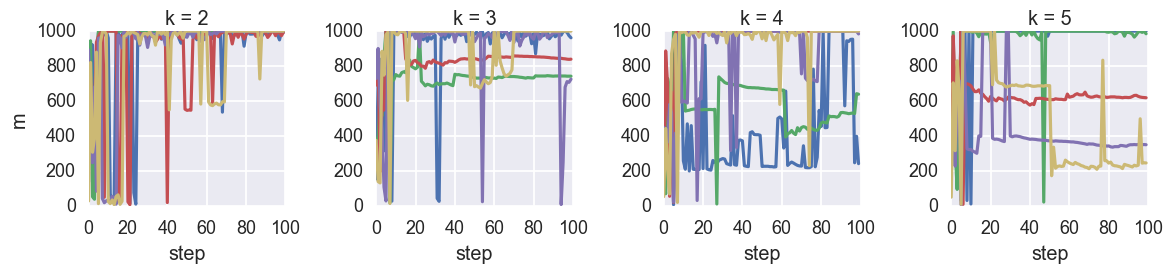

In [14]:
with sns.plotting_context('talk', font_scale=1):
    g = sns.FacetGrid(data=df, col='k', hue='run', sharey='col')
    g.map(plt.plot, 'step', 'm')

In [18]:
best_idx = df.groupby(['run','k'])['MCV_test'].transform(max) == df['MCV_test']

best_df = df.loc[best_idx, :].sort_values(by=['k', 'run'])
best_df

,parameters,project_name,test_scores,train_scores,run,started,step,k,m,MCV_train,MCV_test
369,"{'msm__sparse': False, 'msm__count_mode': 'sli...",k2,"[1.941139177408537, 1.9437421368378947, 1.9418...","[1.943587738639269, 1.939660654181837, 1.94246...",1,2018-01-13 17:20:16.629917,87,2,988,1.942102,1.942079
29,"{'msm__sparse': False, 'msm__count_mode': 'sli...",k2,"[1.938737716335467, 1.9414677519196866, 1.9426...","[1.9441295305342328, 1.9427893100931255, 1.940...",2,2018-01-13 17:16:59.194485,7,2,1000,1.942232,1.941672
392,"{'msm__sparse': False, 'msm__count_mode': 'sli...",k2,"[1.9408100565604482, 1.9437534223086246, 1.941...","[1.9418683835177744, 1.9409155934931985, 1.943...",3,2018-01-13 17:28:36.901775,95,2,974,1.942210,1.941457
329,"{'msm__sparse': False, 'msm__count_mode': 'sli...",k2,"[1.943869663603145, 1.9431685585484053, 1.9405...","[1.9404523332674042, 1.9415005185900176, 1.939...",4,2018-01-13 17:25:46.425646,74,2,1000,1.941056,1.942464
16,"{'msm__sparse': False, 'msm__dt_traj': '1 step...",k2,"[1.9436484592531866, 1.9395201544467646, 1.942...","[1.9405794620150143, 1.943612280325536, 1.9412...",5,2018-01-13 17:16:34.221505,3,2,387,1.941615,1.941960
96,"{'msm__sparse': False, 'msm__count_mode': 'sli...",k3,"[2.615200305410932, 2.6188847173387213, 2.6120...","[2.611401108679275, 2.6113357277183518, 2.6149...",1,2018-01-13 17:10:58.974786,20,3,990,2.611925,2.616988
301,"{'msm__sparse': False, 'msm__dt_traj': '1 step...",k3,"[2.610117721586175, 2.6223331959544702, 2.6180...","[2.6154608572594853, 2.608201931930232, 2.6015...",2,2018-01-13 17:23:58.797693,86,3,744,2.611091,2.616336
100,"{'msm__sparse': False, 'msm__count_mode': 'sli...",k3,"[2.613559845188626, 2.611341389807096, 2.60903...","[2.6166493775583577, 2.614948400064102, 2.6154...",3,2018-01-13 17:18:48.054377,24,3,800,2.616190,2.612099
65,"{'msm__sparse': False, 'msm__count_mode': 'sli...",k3,"[2.608963616342141, 2.604934088543536, 2.62389...","[2.621470762121387, 2.6160771257524438, 2.6057...",4,2018-01-13 17:17:40.656662,13,3,994,2.613276,2.614287
371,"{'msm__sparse': False, 'msm__count_mode': 'sli...",k3,"[2.6179732613818834, 2.6111431654980506, 2.618...","[2.612983041106801, 2.6129272195718496, 2.6088...",5,2018-01-13 17:27:06.487307,92,3,1000,2.612097,2.615316
